# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find_all('table', class_='table')

headers = soup.find_all('th')

rows = soup.find_all('tr', class_ = 'data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_weather_header = []
mars_weather_data = []

# Loop through the scraped data to create a list of rows

for header in headers:
    mars_weather_header.append(header.text)

mars_weather_header

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [7]:
for row in rows:
    row_data = []
    for data in row.find_all('td'):
        row_data.append(data.text)
    mars_weather_data.append(row_data)
    
mars_weather_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
# just tried it for fun.   :)
# mars_df = pd.read_html(url)
# mars_df

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(mars_weather_data, columns=mars_weather_header)

In [10]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [11]:
browser.quit()

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
mars_weather_df['id'] = pd.to_numeric(mars_weather_df['id'], downcast='integer')
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = pd.to_numeric(mars_weather_df['sol'], downcast='integer')
mars_weather_df['ls'] = pd.to_numeric(mars_weather_df['ls'], downcast='integer')
mars_weather_df['month'] = pd.to_numeric(mars_weather_df['month'], downcast='integer')
mars_weather_df['min_temp'] = pd.to_numeric(mars_weather_df['min_temp'], downcast='float')
mars_weather_df['pressure'] = pd.to_numeric(mars_weather_df['pressure'], downcast='float')

In [14]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                           int16
terrestrial_date    datetime64[ns]
sol                          int16
ls                           int16
month                         int8
min_temp                   float32
pressure                   float32
dtype: object

In [15]:
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
months = mars_weather_df['month'].max()

print(f"There are {months} months in a Martian year.")

There are 12 months in a Martian year.


In [17]:
# 2. How many Martian days' worth of data are there?
days = mars_weather_df["sol"].max() - mars_weather_df["sol"].min()

print(f"The dataset contains {days} Sol days of data.")

The dataset contains 1967 Sol days of data.


In [27]:
# 3. What is the average low temperature by month?
average = mars_weather_df.groupby(['month']).mean()['min_temp']

average

month
1    -77.160919
2    -79.932587
3    -83.307289
4    -82.747421
5    -79.308723
6    -75.299316
7    -72.281693
8    -68.382980
9    -69.171638
10   -71.982140
11   -71.985504
12   -74.451805
Name: min_temp, dtype: float32

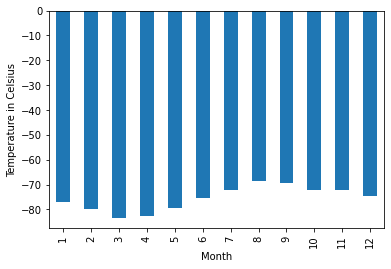

In [28]:
# Plot the average temperature by month
average.plot(kind='bar', xlabel='Month', ylabel='Temperature in Celsius')
plt.show()

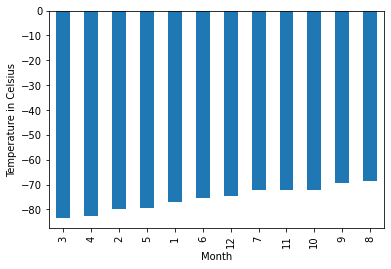

In [29]:
# Identify the coldest and hottest months in Curiosity's location
average_sorted = average.sort_values(ascending=True)
average_sorted.plot(kind='bar', xlabel='Month', ylabel='Temperature in Celsius')
plt.show()

In [30]:
print("The coldest month is the 3rd month, and the warmest month is the 8th month")

The coldest month is the 3rd month, and the warmest month is the 8th month


In [31]:
# 4. Average pressure by Martian month
avg_pressure = mars_weather_df.groupby(['month']).mean()['pressure']

avg_pressure

month
1     862.488525
2     889.455078
3     877.322937
4     806.329895
5     748.557068
6     745.054443
7     795.105652
8     873.829773
9     913.305969
10    887.312500
11    857.014465
12    842.156616
Name: pressure, dtype: float32

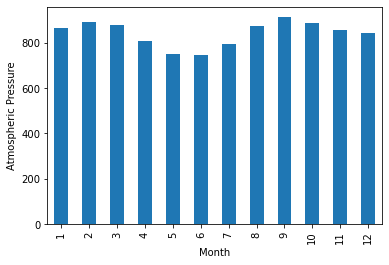

In [33]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', xlabel='Month', ylabel='Atmospheric Pressure')
plt.show()

In [44]:
print("Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.")

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.


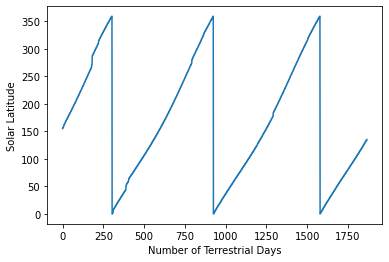

In [45]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_weather_df['ls'].plot(
    kind='line', 
    xlabel='Number of Terrestrial Days', 
    ylabel='Solar Latitude')
plt.show()

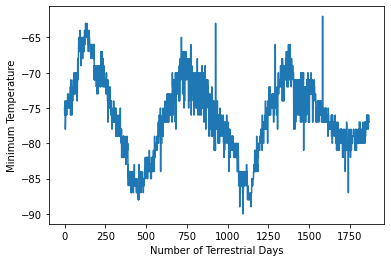

In [46]:
mars_weather_df['min_temp'].plot(
    kind='line', 
    xlabel='Number of Terrestrial Days', 
    ylabel='Minimum Temperature')
plt.show()

In [47]:
print("""
By Solar Latitude, the terrestrial time interval taken for a full Mars orbit (0 degrees to 0 degrees) appears to be roughly 925-275, 
and 1600-925 so approximately +/- 650-675 sol days")

By minimum temperature, The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days 
from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.""")


By Solar Latitude, the terrestrial time interval taken for a full Mars orbit (0 degrees to 0 degrees) appears to be roughly 925-275, 
and 1600-925 so approximately +/- 650-675 sol days")

By minimum temperature, The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days 
from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.


In [52]:
# finding the orbital period from the first reading to when mars returns to that same position.

orbit_period = mars_weather_df['terrestrial_date'].loc[(mars_weather_df['ls']==mars_weather_df['ls'][0]) & (mars_weather_df.index!=0)].iloc[0] - mars_weather_df['terrestrial_date'][0]

print(f"By calculation of the solar latitude, the orbital period of mars is roughly {orbit_period.days} days")

By calculation of the solar latitude, the orbital period of mars is roughly 686 days


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [54]:
# Write the data to a CSV
mars_weather_df.to_csv("mars_weather.csv", index_label="Mars_Weather")